## Random Forest Regressor
##### For predicting shuttlecock trajectory
Random Forest is an ensemble learning algorithm that combines multiple decision trees to make predictions. It can handle both numerical and categorical data and is capable of capturing complex relationships in the data. It does not require feature standardization as they are not sensitive to the scale of the features. Random Forest algorithms work by creating decision trees based on random subsets of features, and each decision tree independently makes decisions based on these features. 

It is used as one of the regression models to predict a shuttlecock's position for various sequences within an observation group. 
#### Dependencies for Random Forest Regressor

In [ ]:
import pandas as pd

from sklearn.ensemble import RandomForestRegressor  # for regression tasks

# data mining and model evaluation
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# visualization
import matplotlib.pyplot as plt

### Preparing data for Random Forest Regressor (Normal)
The Random Forest Regressor is to be trained using inputs such as the human player's positions (X, Y, Z), shuttlecock's initial velocity, firing angle, slant angle, and the observation sequence number of the observation group. All sequences of each observation group are used to train the model. 

In [ ]:
def load_and_split_data_regr(filepath):
    """Reusable function to load and split data into train and test sets"""
    data = pd.read_csv(filepath)
    # Define X features
    x_features_normal = data[['HUMAN PLAYER POSITION(X) metres', 
        'HUMAN PLAYER POSITION(Y) metres', 
        'HUMAN PLAYER POSITION(Z) metres',
        'INITIAL VELOCITY OF SHUTTLECOCK(m/s)', 
        'INITIAL SHUTTLECOCK FIRING ANGLE(DEGREE)', 
        'INITIAL SHUTTLECOCK SLANT ANGLE TO SIDELINE(DEGREE)',
        'OBSERVATION NUMBER']]
    # Define Y features
    y_features_normal = data[['SHUTTLECOCK POSITION IN AIR(X) metres', 
        'SHUTTLECOCK POSITION IN AIR(Y) metres', 
        'SHUTTLECOCK POSITION IN AIR(Z) metres']]
    # Train-Test splits
    x_train, x_test_normal, y_train, y_test = train_test_split(x_features_normal, y_features_normal, test_size=0.2, random_state=42)
    return x_train, x_test_normal, y_train, y_test

In [ ]:
normal_data_fp = "../../data/cleaned/normal_data.csv"
x_train_normal, x_test_normal, y_train_normal, y_test_normal = load_and_split_data_regr(normal_data_fp)

### Optimal Depth for Random Forest Regressor (Normal)
The depth of a decision tree defines how many times the data can be split before reaching a leaf node. To find the optimal depth for the Decision Tree, multiple models are trained at different depths, and accuracy scores are recorded for both training and test sets. This ensures the best balance between performance and generalization.

In [26]:
def explore_optimal_depth(depths, x_train, y_train, x_test, y_test):
    """Reusable function to explore optimal depth for Regressor Model"""
    # Define a list of depths to test
    mse_scores_depth = []

    # Iterate over different depths and calculate MSE
    for depth in depths:
        temp_model = RandomForestRegressor(n_estimators=100, max_depth=depth, random_state=42)
        temp_model.fit(x_train, y_train)
        temp_y_pred = temp_model.predict(x_test)
        temp_mse_depth = mean_squared_error(y_test, temp_y_pred)
        mse_scores_depth.append(temp_mse_depth)
        print(f"Depth: {depth}, MSE: {temp_mse_depth}")
    return mse_scores_depth

In [27]:
depths = [5, 10, 15, 20, 25, 30]
mse_score_depth_normal = explore_optimal_depth(depths, x_train_normal, y_train_normal, x_test_normal, y_test_normal)

Depth: 5, MSE: 0.7792096322325176
Depth: 10, MSE: 0.05117493127642725
Depth: 15, MSE: 0.0006107810321599828
Depth: 20, MSE: 0.0003595973783718522
Depth: 25, MSE: 0.0003583364429748694
Depth: 30, MSE: 0.0003583364429748694


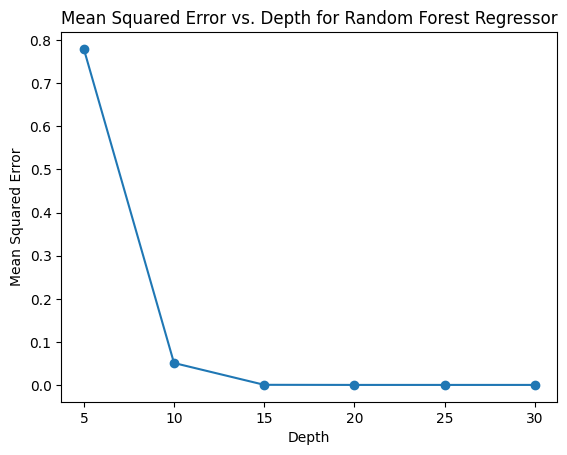

In [ ]:
# Plotting the MSE scores
plt.plot(depths, mse_score_depth_normal, marker='o')
plt.xlabel('Depth')
plt.ylabel('Mean Squared Error')
plt.title('Mean Squared Error vs. Depth for Random Forest Regressor (Normal Data)')
plt.show()

From the diagram, it is observed that the optimal elbow depth is around 15, where the mean squared error seems to stagnate at around 0.0003. Hence, it will be used subsequently as the optimal elbow depth.

### Optimal N Estimator for Random Forest Regressor (Normal)
N estimators defines the maximum number of decision trees to be used by the Random Forest Regressor. Here, multiple models will be built and tested using different number of n estimators, and accuracy scores are recorded for both training and test sets. This ensures a good tradeoff between performance and computation costs.

In [29]:
def explore_optimal_estimators(estimators, optimal_depth, x_train, y_train, x_test, y_test):
    """Reusable function to explore optimal number of estimators for Regressor Model"""
    # Define a list of estimators to test
    mse_scores_estimators = []

    # Iterate over different estimators and calculate MSE
    for estimator in estimators:
        temp_model = RandomForestRegressor(n_estimators=estimator, max_depth=optimal_depth, random_state=42)
        temp_model.fit(x_train, y_train)
        temp_y_pred = temp_model.predict(x_test)
        temp_mse_estimators = mean_squared_error(y_test, temp_y_pred)
        mse_scores_estimators.append(temp_mse_estimators)
        print(f"Estimators: {estimator}, MSE: {temp_mse_estimators}")
    return mse_scores_estimators

In [30]:
n_estimators_values = [50, 100, 150, 200, 250, 300]
mse_score_estimators_normal = explore_optimal_estimators(n_estimators_values, 15, x_train_normal, y_train_normal, x_test_normal, y_test_normal)

Estimators: 50, MSE: 0.0006481456512477402
Estimators: 100, MSE: 0.0006107810321599828
Estimators: 150, MSE: 0.0006015408374632509
Estimators: 200, MSE: 0.0005924325392467031
Estimators: 250, MSE: 0.0005910005722874022
Estimators: 300, MSE: 0.0005887791349280285


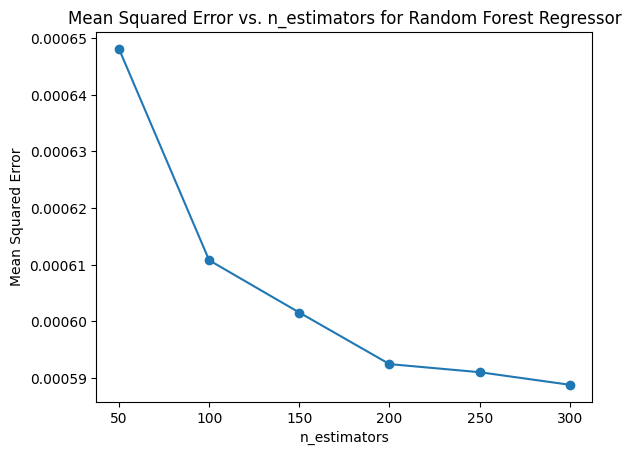

In [ ]:
# Plotting the MSE scores
plt.plot(n_estimators_values, mse_score_estimators_normal, marker='o')
plt.xlabel('n_estimators')
plt.ylabel('Mean Squared Error')
plt.title('Mean Squared Error vs. n_estimators for Random Forest Regressor (Normal Data)')
plt.show()

From the diagram, it is observed the optimal n estimators is 200, as mean squared error flatlines at around 0.00059 despite increased computational costs.

Optimal Configurations for dealing with a Random Forest Regressor (Normal) will be max depth 15, n estimators 200. 

### Preparing Data for Random Forest Regressor (Limited)
Same procedures as earlier, with datasets of limited and derived features. 

In [ ]:
limited_data_fp = "../../data/cleaned/limited_data.csv"
x_train_limited, x_test_limited, y_train_limited, y_test_limited = load_and_split_data_regr(limited_data_fp)

### Optimal Depth for Random Forest Regressor (Limited)
Reusing same depths, with the dataset of limited and derived features

In [31]:
mse_score_depth_limited = explore_optimal_depth(depths, x_train_limited, y_train_limited, x_test_limited, y_test_limited)

Depth: 5, MSE: 0.7792096322325176
Depth: 10, MSE: 0.05117493127642725
Depth: 15, MSE: 0.0006107810321599828
Depth: 20, MSE: 0.0003595973783718522
Depth: 25, MSE: 0.0003583364429748694
Depth: 30, MSE: 0.0003583364429748694


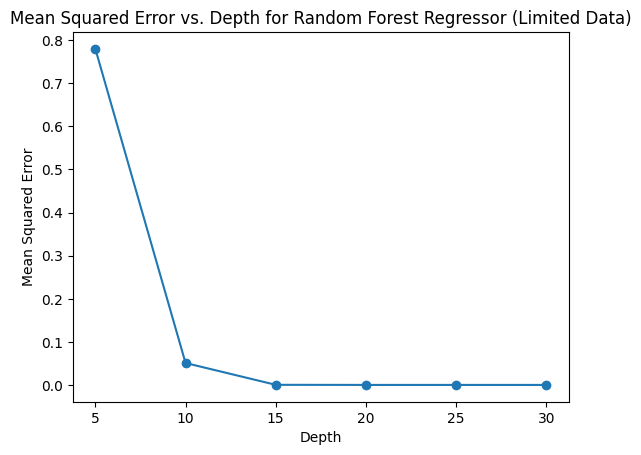

In [32]:
# Plotting the MSE scores
plt.plot(depths, mse_score_depth_limited, marker='o')
plt.xlabel('Depth')
plt.ylabel('Mean Squared Error')
plt.title('Mean Squared Error vs. Depth for Random Forest Regressor (Limited Data)')
plt.show()

From the diagram, it is observed that the optimal elbow depth is around 15, where the mean squared error seems to stagnate at around 0.0003. Hence, it will be used subsequently as the optimal elbow depth.

### Optimal N Estimator for Random Forest Regressor (Limited)
Reusing same n estimator values, with the dataset of limited and derived features

In [33]:
mse_score_estimators_limited = explore_optimal_estimators(n_estimators_values, 15, x_train_limited, y_train_limited, x_test_limited, y_test_limited)

Estimators: 50, MSE: 0.0006481456512477402
Estimators: 100, MSE: 0.0006107810321599828
Estimators: 150, MSE: 0.0006015408374632509
Estimators: 200, MSE: 0.0005924325392467031
Estimators: 250, MSE: 0.0005910005722874022
Estimators: 300, MSE: 0.0005887791349280285


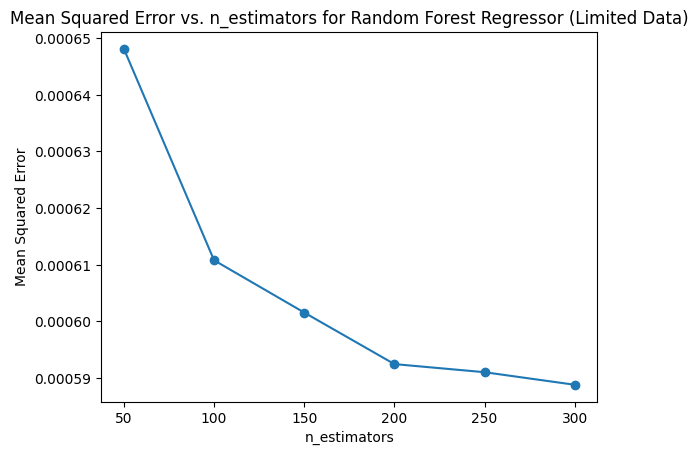

In [34]:
# Plotting the MSE scores
plt.plot(n_estimators_values, mse_score_estimators_limited, marker='o')
plt.xlabel('n_estimators')
plt.ylabel('Mean Squared Error')
plt.title('Mean Squared Error vs. n_estimators for Random Forest Regressor (Limited Data)')
plt.show()

From the diagram, it is observed the optimal n estimators is 200, as mean squared error flatlines at around 0.00059 despite increased computational costs.

Optimal Configurations for dealing with a Random Forest Regressor (Limited) will be max depth 15, n estimators 200. 